<a href="https://colab.research.google.com/github/mindy15963/wikipedia-wc-analysis/blob/main/wikipedia_wc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install wikipedia
!pip install konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

사용할 언어 입력 : 영어
분석할 문서 입력 : Virginia


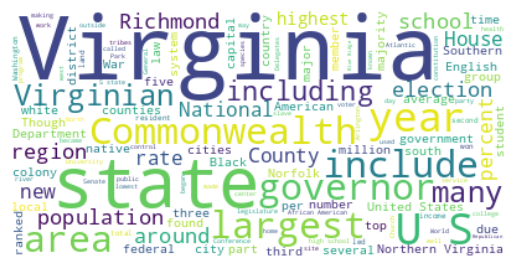

In [6]:
import wikipedia
from wordcloud import WordCloud, STOPWORDS

lang=input("사용할 언어 입력 : ")

match lang:
    case "한국어":
        wikipedia.set_lang("ko")
        title=input("분석할 문서 입력 : ")
        wiki=wikipedia.page(title)
        text=wiki.content

        from konlpy.tag import Okt
        okt=Okt()
        text=okt.nouns(text)

        wordcloud=WordCloud(font_path='NanumBarunGothic',background_color='white')

        stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
        clean_text=[word for word in text if not word in stopwords]
        from collections import Counter
        c=Counter(clean_text)
        wordcloud.generate_from_frequencies(c)
    case "영어":
        wikipedia.set_lang("en")
        title=input("분석할 문서 입력 : ")
        wiki=wikipedia.page(title)
        text=wiki.content

        s_words=STOPWORDS.union({'one','using','first','two','make','use'})
        wordcloud=WordCloud(stopwords=s_words,background_color='white').generate(text)

import matplotlib.pyplot as plt

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()